In [2]:
import numpy as np

import sys
sys.path.append('src/')

import matplotlib
matplotlib.rcParams['animation.embed_limit'] = 2**128
%matplotlib inline

from IPython.core.display import display, HTML

from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

import src.utility as util
import src.plotting as plot
import src.simulator as sim

Choose a the set of segments defining the perimeter of the region and of a complex enough lawn.

In [3]:
lawn_points = [[(0,10), (15,10)], 
               [(15,10), (15,0)], 
               [(15,0), (4,0)], 
               [(4,0), (4,3)], 
               [(4,3), (7,3)], 
               [(7,3), (7,2)], 
               [(7,2), (12,2)], 
               [(12,2), (12,6)], 
               [(12,6), (3,6)], 
               [(3,6), (3,3)], 
               [(3,3), (1,3)], 
               [(1,3), (1,5)], 
               [(1,5), (0,5)], 
               [(0,5), (0,10)]
              ]

region_points = [[(0,10), (15,10)], 
                 [(15,10), (15,0)], 
                 [(15,0), (2,0)], 
                 [(2,0), (0,5)],
                 [(0,5), (0,10)]
                ]

Visualise the regions

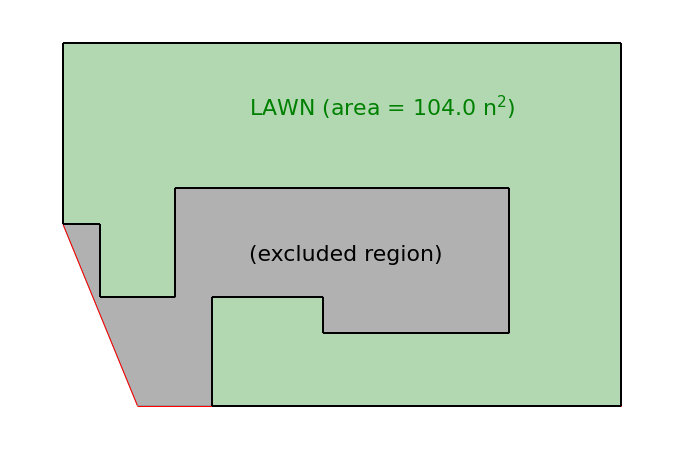

In [4]:
_, ax = plot.get_lawn_region_plot(lawn_points, region_points)

lawn_perimeter = np.array(lawn_points).reshape(-1,2)[::2]
lawn_perimeter = np.vstack((lawn_perimeter, lawn_perimeter[0]))
lawn_polygon = Polygon(lawn_perimeter)
lawn_area = lawn_polygon.area

ax.text(5, 8, f"LAWN (area = {lawn_area} n$^2$)", color='g', fontsize=22);
ax.text(5, 4, "(excluded region)", color='k', fontsize=22);

Initialise the two mowers at the random locations and simulate one operation cycle

In [4]:
mower_size = 0.15

kwargs = {'theta_min': -3*np.pi/2, 
          'theta_max': 3*np.pi/2, 
          'unit_size': mower_size,
          'lawn_points': lawn_points,
          'region_points': region_points
         }

MW = sim.Simulator(**kwargs)

In [5]:
MW.simulate()

path_unit0 = np.asarray(MW.path_unit0)
path_unit1 = np.asarray(MW.path_unit1)

pos0_unit0 = path_unit0[0] 
pos0_unit1 = path_unit1[0]

Display the results

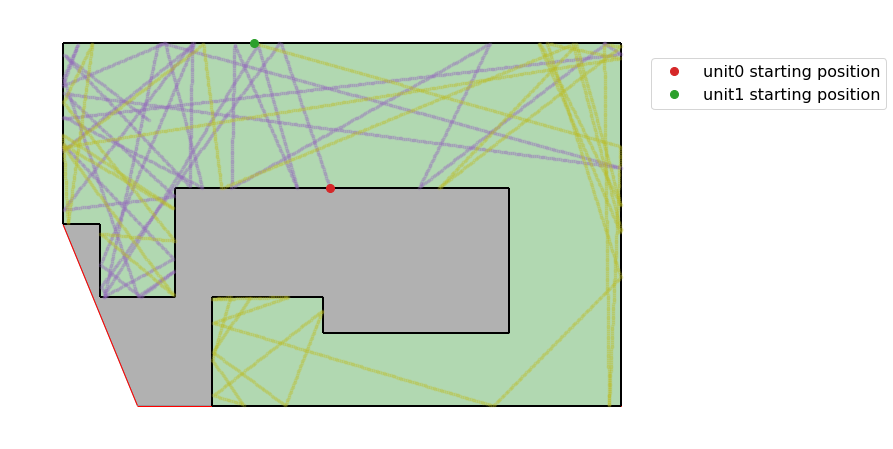

In [6]:
_, ax = plot.get_lawn_region_plot(lawn_points, region_points)

ax.plot(*pos0_unit0, 'C3o', ms=8, zorder=10, label="unit0 starting position");
ax.plot(*pos0_unit1, 'C2o', ms=8, zorder=10, label="unit1 starting position");
ax.legend(bbox_to_anchor=(0.95, 0.9), fontsize=16);
ax.plot(*path_unit0.T, 'C4.', alpha=0.2);
ax.plot(*path_unit1.T, 'C8.', alpha=0.2);

In [7]:
%%capture
fig, ax = plot.get_lawn_region_plot(lawn_points, region_points)
ax.axis('on')
animation = plot.get_mowers_animation(ax, fig, path_unit0, path_unit1)

In [8]:
link = animation.to_html5_video()

display(HTML(link))